# Marketing Analytics: Predicting Customer Churn for a Telecom Company


### Description

This dataset is randomly collected over a period of 12 months. A total of 3150 rows of data, each representing a customer.

All of the attributes except for attribute churn is the aggregated data of the first 9 months. The churn labels are the state of the customers at the end of 12 months. The three months is the designated planning gap.

Churn is when a customer stops doing business or ends a relationship with a company. \
It’s a common problem across a variety of industries, from telecommunications to cable TV to SaaS, and a company that can predict churn can take proactive action to retain valuable customers and get ahead of the competition.

We will explore and visualize the data, prepare it for modeling, make predictions using machine learning, and communicate important, actionable insights to stakeholders.

The selected model for this task is **Random Forest Classification**.

### Dictionary 

| Variable name | Description       |
|:--------------|:------------------|
|Account_Length|Amount of days that the client has had the account|
|Vmail_Message|Numner of voice mails|
|Day_Mins|Number of minutes of outgoing calls during the day|
|Eve_Mins|Number of minutes of outgoing calls during the evening|
|Night_Mins|Number of minutes of outgoing calls during the night|
|Intl_Mins|Number of minutes of outgoing calls for international calls|
|CustServ_Calls|Number of calls to the customer service|
|Churn|Customer churn|
|Intl_Plan|Client has an international plan|
|Vmail_Plan|Client has an international plan|
|Day_Calls|Number of outgoing calls during the day|
|Day_Charge|The charge for the outgoing calls during the day|
|Eve_Calls|Number of outgoing calls during the evening|
|Eve_Charge|The charge for the outgoing calls during the evening|
|Night_Calls|Number of outgoing calls during the night|
|Night_Charge|The charge for the outgoing calls during the night|
|Intl_Calls|Number of outgoing calls during the night|
|Intl_Charge|The charge for the outgoing calls during the night|
|State|The state where the client lives|
|Phone|The phone number of the client||

## Exploratory data analysis

While examining the dictionary, we can identify __Churn__ as the variable to predict.

Let's verify which values the variable holds.

In [113]:
import pandas as pd

file = "churn_telecom.csv"
telco = pd.read_csv(file)

In [114]:
print(telco["Churn"].value_counts())

no     2850
yes     483
Name: Churn, dtype: int64


__yes__ = will churn \
__no__ = will not churn

We have decided to work with the hypothesis that customers that are not satisfied, will call the customer service more often.

The question that we will try to answer:

- Do churners call customer service more often?

To verify this hypothesis in an easy way, we will calculate the mean and the standard deviation of the number of calls to the client service made by churners and non-churners.

__Mean number of calls:__

In [115]:
# Group telco by 'Churn' and compute the mean
churn_mean = telco.groupby(['Churn']).mean()
print(churn_mean["CustServ_Calls"])

Churn
no     1.449825
yes    2.229814
Name: CustServ_Calls, dtype: float64


__Median number of calls:__

In [116]:
churn_std = telco.groupby(['Churn']).std()
print(churn_std["CustServ_Calls"])

Churn
no     1.163883
yes    1.853275
Name: CustServ_Calls, dtype: float64


Perhaps unsurprisingly, churners seem to make more customer service calls than non-churners.

The boxplot below compares the distribution of the account length between the churners and non-churners in the provided dataset. As we can see the distrubution is even.

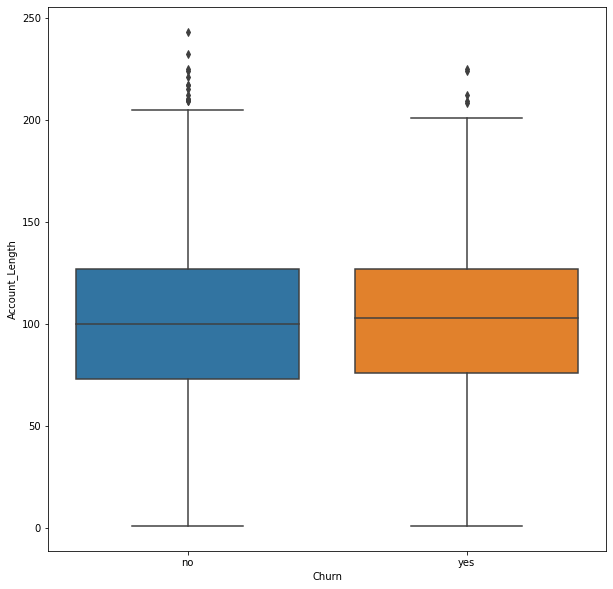

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
sns.boxplot(x = "Churn", y = "Account_Length", data = telco)
plt.show()

Visualize the distribution of the account length.

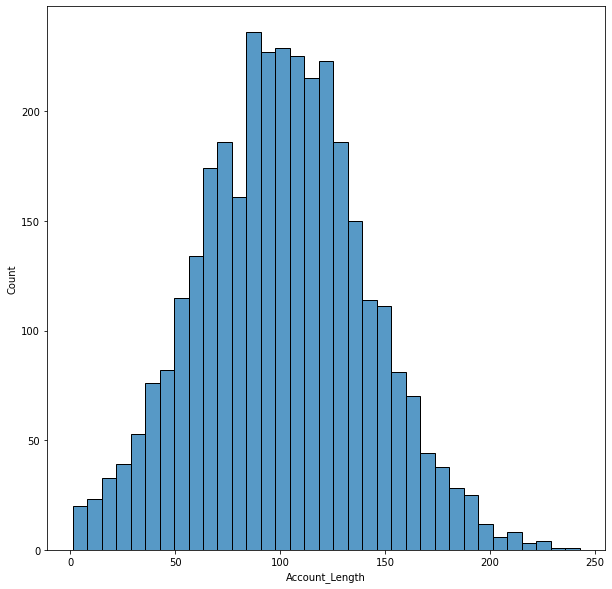

In [165]:
plt.figure(figsize=(10,10))

# Visualize the distribution of 'Account_Length'
sns.histplot(telco["Account_Length"])
plt.show()

Do customers who have international plans make more customer service calls? Or do they tend to churn more?

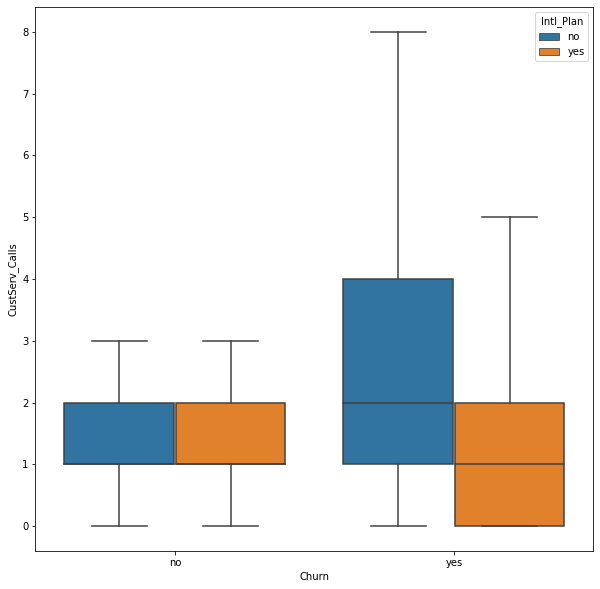

In [119]:
# Create the box plot

plt.figure(figsize=(10,10))

# Remove outlisers with sym = ""
sns.boxplot(x = 'Churn',
          y = 'CustServ_Calls',
          sym = "",
          hue = "Intl_Plan",
          data = telco)

# Display the plot
plt.show()

We can state that clients with international plans are churning less than those with other plans.

## Data pre-processing

In [120]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   object 
 8   Intl_Plan       3333 non-null   object 
 9   Vmail_Plan      3333 non-null   object 
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 non-null   f

In [121]:
# List all unique values in every column
pd.Series({c: telco[c].unique() for c in telco})

Account_Length    [128, 107, 137, 84, 75, 118, 121, 147, 117, 14...
Vmail_Message     [25, 26, 0, 24, 37, 27, 33, 39, 30, 41, 28, 34...
Day_Mins          [265.1, 161.6, 243.4, 299.4, 166.7, 223.4, 218...
Eve_Mins          [197.4, 195.5, 121.2, 61.9, 148.3, 220.6, 348....
Night_Mins        [244.7, 254.4, 162.6, 196.9, 186.9, 203.9, 212...
Intl_Mins         [10.0, 13.7, 12.2, 6.6, 10.1, 6.3, 7.5, 7.1, 8...
CustServ_Calls                       [1, 0, 2, 3, 4, 5, 7, 9, 6, 8]
Churn                                                     [no, yes]
Intl_Plan                                                 [no, yes]
Vmail_Plan                                                [yes, no]
Day_Calls         [110, 123, 114, 71, 113, 98, 88, 79, 97, 84, 1...
Day_Charge        [45.07, 27.47, 41.38, 50.9, 28.34, 37.98, 37.0...
Eve_Calls         [99, 103, 110, 88, 122, 101, 108, 94, 80, 111,...
Eve_Charge        [16.78, 16.62, 10.3, 5.26, 12.61, 18.75, 29.62...
Night_Calls       [91, 103, 104, 89, 121, 118, 9

By looking at the data we presume that the variables _Area_code_ and _Phone_ are not related to the churn and thus can be dropped.

In [122]:
telco = telco.drop(['Area_Code', 'Phone'], axis=1)

To avoid using highly correlated variables in the modelling, we need to remove them.

In [123]:
telco.corr()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
Account_Length,1.000000,-0.004628,0.006216,-0.006757,-0.008955,0.009514,-0.003796,0.038470,0.006214,0.019260,-0.006745,-0.013176,-0.008960,0.020661,0.009546
Vmail_Message,-0.004628,1.000000,0.000778,0.017562,0.007681,0.002856,-0.013263,-0.009548,0.000776,-0.005864,0.017578,0.007123,0.007663,0.013957,0.002884
Day_Mins,0.006216,0.000778,1.000000,0.007043,0.004323,-0.010155,-0.013423,0.006750,1.000000,0.015769,0.007029,0.022972,0.004300,0.008033,-0.010092
Eve_Mins,-0.006757,0.017562,0.007043,1.000000,-0.012584,-0.011035,-0.012985,-0.021451,0.007050,-0.011430,1.000000,0.007586,-0.012593,0.002541,-0.011067
Night_Mins,-0.008955,0.007681,0.004323,-0.012584,1.000000,-0.015207,-0.009288,0.022938,0.004324,-0.002093,-0.012592,0.011204,0.999999,-0.012353,-0.015180
Intl_Mins,0.009514,0.002856,-0.010155,-0.011035,-0.015207,1.000000,-0.009640,0.021565,-0.010157,0.008703,-0.011043,-0.013605,-0.015214,0.032304,0.999993
CustServ_Calls,-0.003796,-0.013263,-0.013423,-0.012985,-0.009288,-0.009640,1.000000,-0.018942,-0.013427,0.002423,-0.012987,-0.012802,-0.009277,-0.017561,-0.009675
Day_Calls,0.038470,-0.009548,0.006750,-0.021451,0.022938,0.021565,-0.018942,1.000000,0.006753,0.006462,-0.021449,-0.019557,0.022927,0.004574,0.021666
Day_Charge,0.006214,0.000776,1.000000,0.007050,0.004324,-0.010157,-0.013427,0.006753,1.000000,0.015769,0.007036,0.022972,0.004301,0.008032,-0.010094
Eve_Calls,0.019260,-0.005864,0.015769,-0.011430,-0.002093,0.008703,0.002423,0.006462,0.015769,1.000000,-0.011423,0.007710,-0.002056,0.017434,0.008674


As seen in the table above, these features are higly correlated and one of them can therefore be removed.

Day_Charge & Day_Mins \
Eve_Charge & Eve_Mins \
Night_Charge & Night_Mins \
Intl_Charge & Intl_Mins

In [124]:
telco = telco.drop(['Day_Charge', 'Eve_Charge', 'Night_Charge', 'Intl_Charge'], axis=1)

### Identifying features to normalize

It is preferable to have features like __Churn__ encoded as 0 and 1 instead of _no_ and _yes_, so that it can then fed it into machine learning algorithms that only accept numeric values, like the model selected for this task.

We see that __Churn__, __Intl_Plan__, __Vmail_Plan__ are objects and need to be transformed. \
Since they only have _yes_ and _no_ as values, they can be transformed into _1_ and _0_.

In [125]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
telco['Vmail_Plan'] = le.fit_transform(telco['Vmail_Plan'])
telco['Intl_Plan'] = le.fit_transform(telco['Intl_Plan'])
telco['Churn'] = le.fit_transform(telco['Churn'])


#### One hot encode the State column

_State_ has too many values to be converted manually. Instaed we will __one hot encode__ this variable.

In [126]:
normalised_states = pd.get_dummies(telco['State'], prefix='state')

# Use pd.concat() to join the columns and then drop() the original country column:
telco = pd.concat([telco, normalised_states], axis=1)
telco.drop('State', axis=1, inplace=True)

#### Feature scaling

When the columns _Intl_Calls_ and _Night_Mins_ are compared, wa can see that there is a large span between the values, which can cause problems for the model.

Therfore the dataset need to be serialized.

In [127]:
from sklearn.preprocessing import StandardScaler

column_names = telco.columns
telco_scaled = StandardScaler().fit_transform(telco)
telco_scaled = pd.DataFrame(telco_scaled, columns = column_names)

## Making Predictions

The data has been processed. Correlated values have been removed, categorical values have been normalized and the data has been serialized.

### Predicting whether a new customer will churn

In [128]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = telco_scaled.drop('Churn', axis=1)
y = telco['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

## Evaluating Model Performance



### Accuracy, precision, recall

In [129]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print(telco['Churn'].value_counts())

0    2850
1     483
Name: Churn, dtype: int64


Imbalanced data happens when a class has too many variables, like in the this dataset where there are 2850 "no" and 483 "yes".

In unbalanced classes accuracy is not a very useful usable. \
Therefore a __confusion matrix__ can be used from where __precision__ and __recall__ can be calculated.

In [130]:
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

precison_score_default = round(precision_score(y_test, y_pred), 3)
recall_score_default = round(recall_score(y_test, y_pred), 3)

print("Precision score: {}".format(precison_score_default))
print("Recall score: {}".format(recall_score_default))

[[856   6]
 [ 46  92]]
Precision score: 0.939
Recall score: 0.667


This model has high precision and low recall, meaning it identifies very well the no-churners.

### ROC curve
Let's now create an ROC curve for our random forest classifier. The first step is to calculate the predicted probabilities output by the classifier for each label.

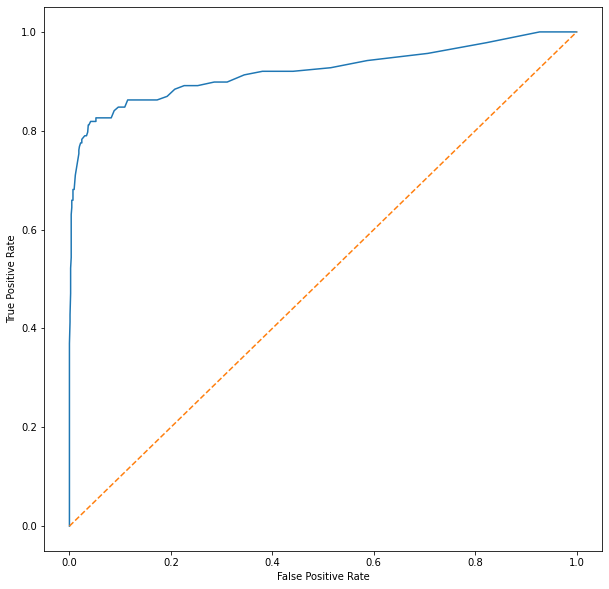

In [140]:
# Generate the probabilities
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# Import roc_curve
from sklearn.metrics import roc_curve

# Calculate the roc metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(10,10))

# Plot the ROC curve
plt.plot(fpr, tpr)

# Add labels and diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "--") # plot straight line
plt.show()

#### Area under the curve

In [132]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Print the AUC
#print(roc_auc_score(y_test, y_pred_prob))
print("The ROC area: {}%".format(round(roc_auc_score(y_test, y_pred_prob)*100, 2)))

The ROC area: 91.85%


### Precision-recall curve
Another way to evaluate model performance is using a precision-recall curve, which shows the tradeoff between precision and recall for different thresholds.

True statements concerning precision-recall curves:

- This curves summarize the tradeoff between the true positive rate and the positive predictive value.

- A high area under the curve represents both high recall and high precision.

- Precision-recall curves tend to be more informative when you have imbalanced classes.

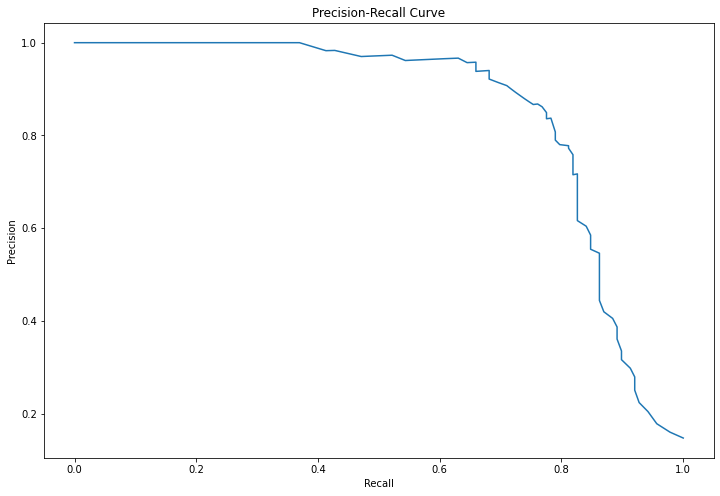

In [152]:
from sklearn.metrics import precision_recall_curve

y_score = clf.predict_proba(X_test)[:, 1]

# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_score)

# Create precision recall curve
plt.figure(figsize=(12,8))
plt.title('Precision-Recall Curve')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.plot(recall, precision)

# Display plot
plt.show()

### F1 score

As you've discovered, there's a tradeoff between precision and recall. Both are important metrics, and depending on how the business is trying to model churn, you may want to focus on optimizing one over the other. Often, stakeholders are interested in a single metric that can quantify model performance. The AUC is one metric you can use in these cases, and another is the F1 score, which is calculated as below:

_2 * (precision * recall) / (precision + recall)_

The advantage of the F1 score is it incorporates both precision and recall into a single metric, and a high F1 score is a sign of a well-performing model, even in situations where you might have imbalanced classes. In scikit-learn, you can compute the f-1 score using using the f1_score function.

In [134]:
from sklearn.metrics import f1_score

f1_score_default = round(f1_score(y_test, y_pred), 3)

print("f1 score before optimization: {}".format(f1_score_default))

f1 score before optimization: 0.78


## Tuning the model

The default hyperparameters used by your models are not always optimized for the data. The goal of grid search cross-validation is to identify those hyperparameters that lead to optimal model performance.

### Grid search
By doing a grid search on the range of the hyperparameter space the algorithm tries to find the most optimal combination.


#### Tuning other hyperparameters

The power of GridSearchCV really comes into play when you're tuning multiple hyperparameters, as then the algorithm tries out all possible combinations of hyperparameters to identify the best combination.

In [135]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# Call GridSearchCV
grid_search = GridSearchCV(clf, param_grid)

# Fit the model
grid_search.fit(X, y)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, None], 'max_features': [1, 3, 10]})

The __.best_params___ attribute of grid search contains the best combination of parameters.

In [136]:
print(grid_search.best_params_)

{'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 10}


Let's create a model using these hyperparameters.

In [137]:
clf = RandomForestClassifier(bootstrap=False, criterion = 'gini', max_depth = None, max_features = 10)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

precision_score_opt = round(precision_score(y_test, y_pred), 3)
recall_score_opt = round(recall_score(y_test, y_pred), 3)
f1_score_opt = round(f1_score(y_test, y_pred), 3)

print("Precision score after optimization: {}".format(precision_score_opt))
print("Recall score after optimization: {}".format(recall_score_opt))
print("f1 score after optimization: {}".format(f1_score_opt))

Precision score after optimization: 0.879
Recall score after optimization: 0.739
f1 score after optimization: 0.803


#### The result
After using the optimal hyper parameters the f1 score has improved.

In [138]:
print("Precision:{} -> {}".format(precison_score_default, precision_score_opt))
print("Recall:{} -> {}".format(recall_score_default, recall_score_opt))
print("f1 score:{} -> {}".format(f1_score_default, f1_score_opt))

__Precision__ :0.939 -> 0.879
__Recall__ :0.667 -> 0.739
__f1 score__ :0.78 -> 0.803


### Feature importances

Scores representing how much each feature contributes to a prediction:

- Effective way to communicate results to stakeholders
- Which features are important drivers of churn?
- Which features can be removed from the model


<Figure size 432x288 with 0 Axes>

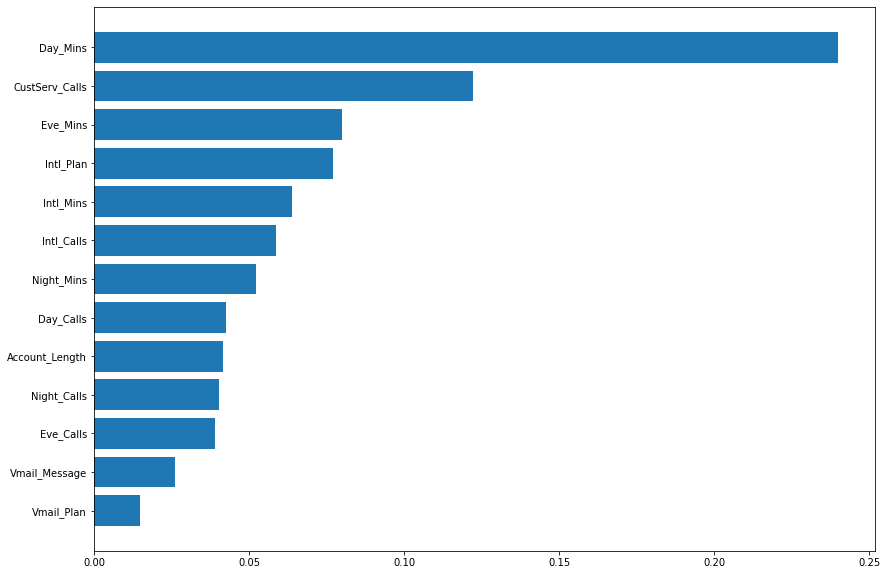

In [153]:
import numpy as np

importances = clf.feature_importances_

# The cimplete plot is a little messy because of all the state features, so we remove them, since they have little importance to the result.
importances = importances[importances > 0.01]

# Sort importances
sorted_index = np.argsort(importances)

# Create labels
labels = X.columns[sorted_index]

# Clear current plot
plt.clf()

# Create plot
plt.figure(figsize = (14,10))
plt.barh(range(len(importances)), importances[sorted_index], tick_label=labels)
plt.show()

## Conclusion

We have a model that can predict no-churners with high precision.

A good F1 score means that the model predicts low false positives and low false negatives.

When looking at important features, two of them appear to important in identifying customers with his probability to churn: __Daily_Mins__ and __CustServ_Calls__.

The conclusion we can draw is that clients that talk much are looking for cheaper options and clients that spend a lot of time with customer support are not happy with the provided service and therefore are looking elsewhere.